<a href="https://colab.research.google.com/github/nhdquyen/Tiki-Web-Scraping/blob/main/1_5_Weekly_Project_Tiki_WebScraper_Quyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

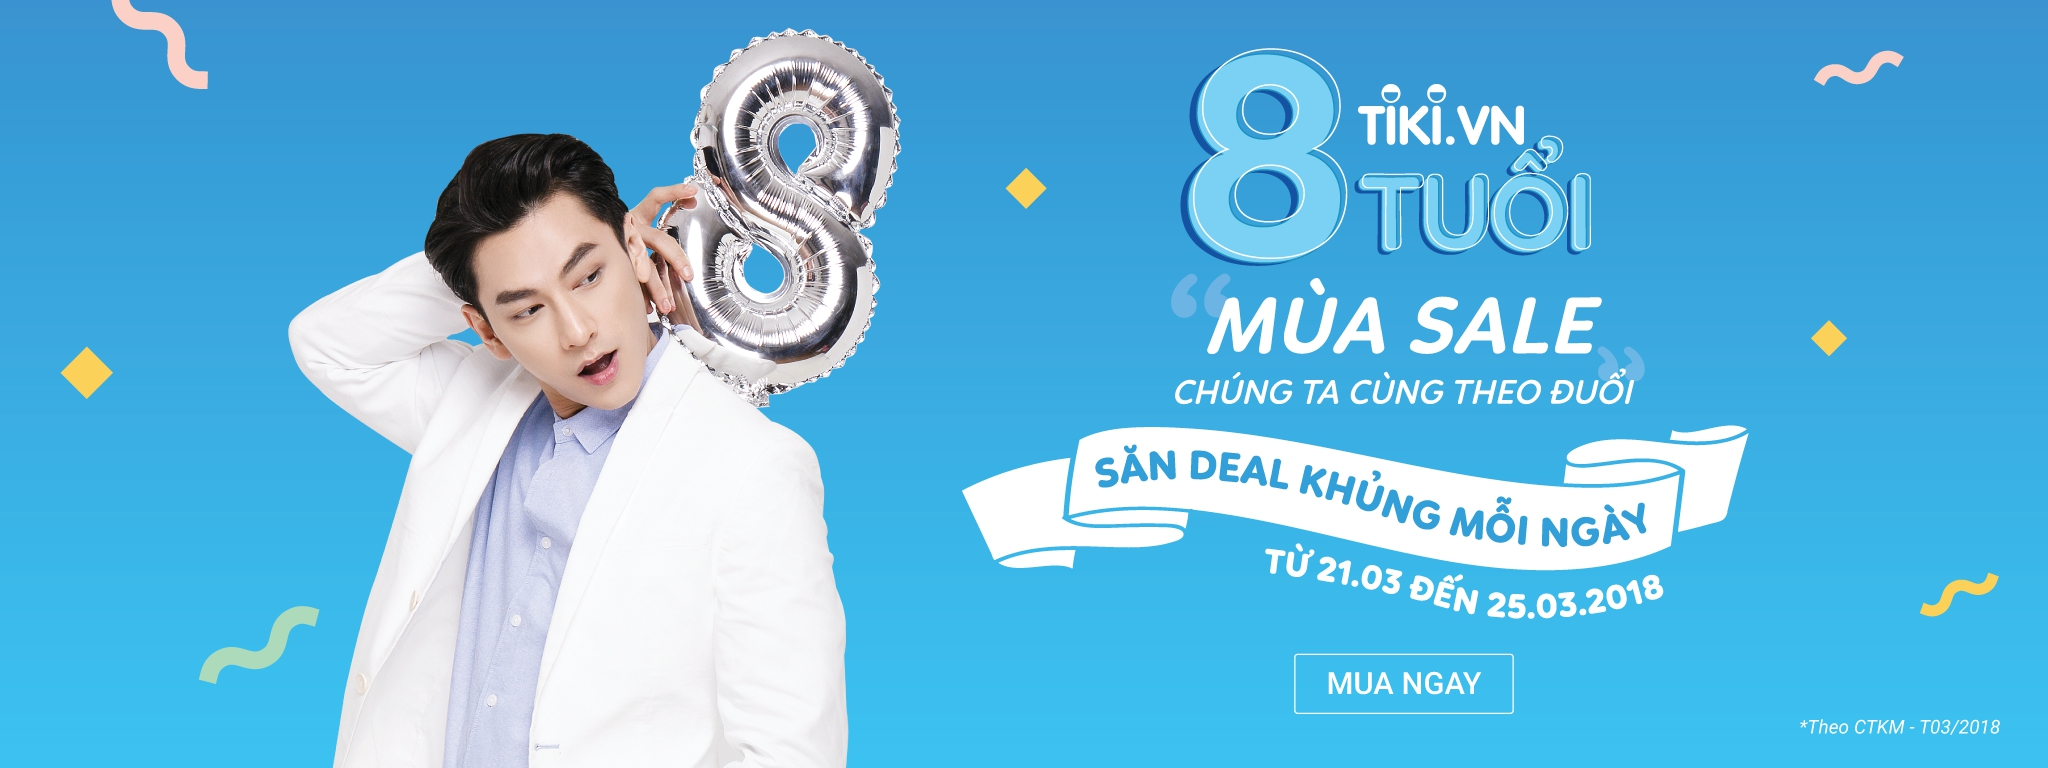



# **Tiki Web Scraping with Selenium**


**Overview**: Build a web-crawler that take in a Tiki URL and return a dataframe 

**Requirements** 
1. Build function that is able to take in an URL and return a pandas dataframe
2. The final dataframe should contain the following informations: 
    * Product Name
    * Price
    * URL of the product image
    * URL of that product page

Bonus: additional information of item rating, Tiki Now, freeship, under_price, discount, installment, gift.



## 1 - Setting up environment ##

In [ ]:
# install selenium and other resources for scraping data
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

     |████████████████████████████████| 958 kB 4.1 MB/s 
     |████████████████████████████████| 356 kB 64.8 MB/s 
     |████████████████████████████████| 138 kB 54.3 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 3.6 MB 31.0 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.down

In [ ]:
### IMPORTS ###
import re
import time
import pandas as pd

from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

In [ ]:
# Global driver to use throughout the script
DRIVER = None

In [ ]:
# Function to (re)start driver
def start_driver(force_restart=False):
    global DRIVER
    
    if DRIVER is not None:
        if force_restart:
            DRIVER.close()
        else:
            raise RuntimeError('ERROR: cannot overwrite an active driver. Please close the driver before restarting.')
    
    # Setting up the driver
    options = webdriver.ChromeOptions()
    options.add_argument('-headless') # we don't want a chrome browser opens, so it will run in the background
    options.add_argument('-no-sandbox')
    options.add_argument('-disable-dev-shm-usage')
    DRIVER = webdriver.Chrome('chromedriver',options=options)

# Wrapper to close driver if its created
def close_driver():
    global DRIVER
    if DRIVER is not None:
        DRIVER.close()
    DRIVER = None

# Create the new chrome browser with specific options
def initialize_driver():
    global DRIVER
    if DRIVER is None:
        print('Initiating driver...')
        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('-headless') 
        chrome_options.add_argument('-no-sandbox') 
        DRIVER = webdriver.Chrome('chromedriver',options=chrome_options)  
        print('Finished!')

In [ ]:
close_driver()
initialize_driver()

Initiating driver...
Finished!


## 2 - Help functions ##

In [ ]:
# inspect number of products in one page
for i in range(5):
    
  DRIVER.get(MAIN_CATEGORIES[i]['URL'])
  all_products = DRIVER.find_elements_by_class_name('product-item')
  print(len(all_products))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """


47
47
47
47
47


In [ ]:
product = DRIVER.find_element_by_class_name('product-item')
product.get_attribute('innerHTML')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


'<span class="style__StyledItem-sc-18svp8n-0 fkDgwT"><div><div class="thumbnail"><img src="https://salt.tikicdn.com/ts/upload/dc/0d/49/3251737db2de83b74eba8a9ad6d03338.png" width="136" height="24" style="bottom:0;left:0" class="styles__StyledDynamicIconBadge-sc-cxexs7-0 hdozRK"><img src="https://salt.tikicdn.com/ts/upload/b9/1f/4b/557eac9c67a4466ccebfa74cde854215.png" width="74" height="18" style="top:0;left:0" class="styles__StyledDynamicIconBadge-sc-cxexs7-0 hdozRK"><picture class="webpimg-container"><source type="image/webp" srcset="https://salt.tikicdn.com/cache/200x200/media/catalog/producttmp/3c/ff/4e/a66a029e723be04dda41a3d76c8f7ba8.png.webp"><img src="https://salt.tikicdn.com/cache/200x200/media/catalog/producttmp/3c/ff/4e/a66a029e723be04dda41a3d76c8f7ba8.png" alt="Camera IP Wifi Ezviz C6N 1080p-Hàng Chính Hãng" class="WebpImg__StyledImg-sc-h3ozu8-0 fWjUGo"></picture></div><div class="info"><div class="badge-service"><div class="item"><div><img width="56" height="16" src="https

In [ ]:
name = product.find_element_by_class_name('name').find_element_by_tag_name('span')
name

/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


<selenium.webdriver.remote.webelement.WebElement (session="0c99e949946ac7fe96f6a162082262c5", element="791c20f9-06ee-4668-a733-ba8f5f80fe3d")>

In [ ]:
name.get_attribute('innerHTML')

'Camera IP Wifi Ezviz C6N 1080p-Hàng Chính Hãng'

In [ ]:
# inspect product review's element 
review = product.find_element_by_class_name('average')
review

/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


<selenium.webdriver.remote.webelement.WebElement (session="0c99e949946ac7fe96f6a162082262c5", element="66f5f67e-86a8-48a7-9d98-8dd277e36c2a")>

In [ ]:
review = review.get_attribute('style')
review

'width: 94%;'

In [ ]:
float(re.sub(r'\D','',review))/20

4.7

In [ ]:
# inspect product's discount
discount = product.find_element_by_class_name('price-discount__discount').get_attribute('innerHTML')
re.sub('\D+', '', discount)

/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


'33'

In [ ]:
# Function to extract product info from the necessary html and json tags
# input selenium web element of one product, output a dictionary that stores requested readable info elements

def get_product_info_single(i):
    d = {'name':'',
         'price':'',
         'product_url':'',
         'image':'',
         'rating':'',
         'tiki_now':'',
         'freeship':'',
         'under_price':'',
         'discount_%':'',
         'installment':'',
         'gift':''}

    # name
    try:
        name = i.find_element_by_class_name('name').find_element_by_tag_name('span')
        d['name'] = name.get_attribute('innerHTML')
    except NoSuchElementException:
        pass
        
    # price
    try:
        price = i.find_element_by_class_name('price-discount__price').get_attribute('innerHTML')
        d['price'] = re.sub(r'[\.\s₫]', '', price)
    except (NoSuchElementException, ValueError):
        d['price'] = -1

    # product url
    try:
        d['product_url'] = i.get_attribute('href')
    except NoSuchElementException:
        pass
    
    # thumbnail
    try:
        thumbnail  = i.find_element_by_class_name('thumbnail').find_elements_by_tag_name('img')[-1]
        d['image'] = thumbnail.get_attribute('src')
    except NoSuchElementException:
        pass

    # rating
    try:
        rating   = i.find_element_by_class_name('average')
        d['rating']   = float(re.sub(r'\D','',rating.get_attribute('style')))/20
    except NoSuchElementException:
        d['rating']   = 0

    # tiki now
    try:
        d['tiki_now'] = bool(i.find_element_by_class_name('badge-service').find_element_by_class_name('item'))
    except NoSuchElementException:
        d['tiki_now'] = False
    
    # freeship
    try:
        freeship_thumbnail = i.find_element_by_class_name('thumbnail')
        d['freeship'] = len(freeship_thumbnail.find_elements_by_tag_name('img')) == 2 # boolean, true if 2 thumbnails at this section 
    except NoSuchElementException:
        d['freeship'] = False

    # under price
    try:
        d['under_price'] = bool(i.find_element_by_class_name('badge-under-price').find_element_by_class_name('item'))
    except NoSuchElementException:
        d['under_price'] = False

    # discount
    try:
        discount = i.find_element_by_class_name('price-discount__discount').get_attribute('innerHTML')
        d['discount_%'] = re.sub('\D+', '', discount)
    except (NoSuchElementException, ValueError):
        d['discount_%'] = 0

    # installment
    try:
        d['installment'] = bool(i.find_element_by_class_name('badge-benefits').find_element_by_tag_name('img'))
    except NoSuchElementException:
        d['installment'] = False
    
    # gift
    try:
        d['gift'] = bool(i.find_element_by_class_name('freegift-list'))
    except NoSuchElementException:
        d['gift'] = False
    
    return d

In [ ]:
# inspect element for product not found:
'''
<div class="style__StyledNotFoundProductView-sc-1uz0b49-0 iSZIiE"><div>Rất tiếc, không tìm thấy sản phẩm phù hợp với lựa chọn của bạn</div></div>
'''

In [ ]:
# Function to scrape all products from a page
# input string of page url, output: list of dictionaries of each product info.

def get_product_info_from_page(page_url):
    global DRIVER
    data = []
    DRIVER.get(page_url) # Use the driver to get info from the product page
    time.sleep(3)

    try: 
        no_product_found = DRIVER.find_element_by_xpath("//div[@class='style__StyledNotFoundProductView-sc-1uz0b49-0']")
        print("EMPTY PAGE")
        return data
    except NoSuchElementException:
        no_product_found = False
    
    # FIND ALL PRODUCT ITEMS
    products   = DRIVER.find_elements_by_class_name('product-item')
    print(f'Found {len(products)} products')
    
    if not no_product_found and len(products):
        for i in products:
            product_dict = get_product_info_single(i)
            data.append(product_dict)
    return data

In [ ]:
# Function to get product info from a main category
# Input: url of one product category, number of page (if 0, scrape all available pages)
# Output: list of dictionaries of each product info from multiple pages in one category


# Inspect the URL difference between page 2 and page 3 of same category:
'''
page_2 = https://tiki.vn/dien-tu-dien-lanh/c4221?page=2&src=c.4221.hamburger_menu_fly_out_banner
page_3 = https://tiki.vn/dien-tu-dien-lanh/c4221?page=3&src=c.4221.hamburger_menu_fly_out_banner

https://tiki.vn/dien-tu-dien-lanh/c4221 ?page=___& src=c.4221.hamburger_menu_fly_out_banner
'''

def get_product_info_from_category(cat_url, max_page=0):

    products = []

    page_n = 1
    main_url, url_opts = cat_url.split('?') # split url
    cat_page_url = main_url + f'?page={page_n}&' + url_opts # manipulate page number according to fucntion param
    product_list = get_product_info_from_page(cat_page_url)

    while len(product_list) > 0:
        products.extend(product_list)
        page_n += 1

        # stop_flag = False if max_page <= 0 else (page_n > max_page)
        stop_flag = max_page > 0 and page_n > max_page # For stopping the scrape according to max_page
        if stop_flag:
            break

        cat_page_url = main_url + f'?page={page_n}&' + url_opts
        product_list = get_product_info_from_page(cat_page_url)
    
    return products

## 3 - Start Scraping ##

In [ ]:
# Urls
TIKI            = 'https://tiki.vn'
MAIN_CATEGORIES = [
    {'Name': 'Điện Thoại - Máy Tính Bảng',
     'URL': 'https://tiki.vn/dien-thoai-may-tinh-bang/c1789?src=c.1789.hamburger_menu_fly_out_banner'},

    {'Name': 'Điện Tử - Điện Lạnh',
     'URL': 'https://tiki.vn/tivi-thiet-bi-nghe-nhin/c4221?src=c.4221.hamburger_menu_fly_out_banner'},

    {'Name': 'Phụ Kiện - Thiết Bị Số', 
     'URL': 'https://tiki.vn/thiet-bi-kts-phu-kien-so/c1815?src=c.1815.hamburger_menu_fly_out_banner'},

    {'Name': 'Laptop - Thiết bị IT', 
     'URL': 'https://tiki.vn/laptop-may-vi-tinh/c1846?src=c.1846.hamburger_menu_fly_out_banner'},

    {'Name': 'Máy Ảnh - Quay Phim', 
     'URL': 'https://tiki.vn/may-anh/c1801?src=c.1801.hamburger_menu_fly_out_banner'},

    {'Name': 'Điện Gia Dụng', 
     'URL': 'https://tiki.vn/dien-gia-dung/c1882?src=c.1882.hamburger_menu_fly_out_banner'},

    {'Name': 'Nhà Cửa Đời Sống', 
     'URL': 'https://tiki.vn/nha-cua-doi-song/c1883?src=c.1883.hamburger_menu_fly_out_banner'},

    {'Name': 'Hàng Tiêu Dùng - Thực Phẩm', 
     'URL': 'https://tiki.vn/bach-hoa-online/c4384?src=c.4384.hamburger_menu_fly_out_banner'},

    {'Name': 'Đồ chơi, Mẹ & Bé', 
     'URL': 'https://tiki.vn/me-va-be/c2549?src=c.2549.hamburger_menu_fly_out_banner'},

    {'Name': 'Làm Đẹp - Sức Khỏe', 
     'URL': 'https://tiki.vn/lam-dep-suc-khoe/c1520?src=c.1520.hamburger_menu_fly_out_banner'},

    {'Name': 'Thể Thao - Dã Ngoại', 
     'URL': 'https://tiki.vn/the-thao/c1975?src=c.1975.hamburger_menu_fly_out_banner'},

    {'Name': 'Xe Máy, Ô tô, Xe Đạp', 
     'URL': 'https://tiki.vn/o-to-xe-may-xe-dap/c8594?src=c.8594.hamburger_menu_fly_out_banner'},

    {'Name': 'Hàng quốc tế', 
     'URL': 'https://tiki.vn/hang-quoc-te/c17166?src=c.17166.hamburger_menu_fly_out_banner'},

    {'Name': 'Sách, VPP & Quà Tặng', 
     'URL': 'https://tiki.vn/nha-sach-tiki/c8322?src=c.8322.hamburger_menu_fly_out_banner'},

    {'Name': 'Voucher - Dịch Vụ - Thẻ Cào', 
     'URL': 'https://tiki.vn/voucher-dich-vu/c11312?src=c.11312.hamburger_menu_fly_out_banner'}
]

In [ ]:
final_result


In [ ]:
df = pd.DataFrame(data=final_result, columns=final_result[0].keys())
df

,name,price,product_url,image,rating,tiki_now,freeship,under_price,discount_%,installment,gift
0,Điện Thoại Samsung Galaxy M12 (4GB/64GB) - Hàn...,3490000,https://tiki.vn/dien-thoai-samsung-galaxy-m12-...,https://salt.tikicdn.com/cache/200x200/ts/prod...,4.8,True,False,True,10,True,False
1,Điện thoại Realme Narzo 50i (4GB/64GB) - Hàng ...,3199000,https://tiki.vn/dien-thoai-realme-narzo-50i-4g...,https://salt.tikicdn.com/cache/200x200/ts/prod...,5.0,False,True,False,13,False,False
2,Điện thoại Xiaomi POCO X3 PRO - Hàng Chính Hãng,5389000,https://tiki.vn/dien-thoai-xiaomi-poco-x3-pro-...,https://salt.tikicdn.com/cache/200x200/ts/prod...,4.8,True,False,False,4,False,False
3,Điện thoại di động Vivo Y21s (4GB/128GB) - Hàn...,4650000,https://tiki.vn/dien-thoai-di-dong-vivo-y21s-4...,https://salt.tikicdn.com/cache/200x200/ts/prod...,0.0,False,False,False,0,False,False
4,Điện Thoại Oppo A54 (6GB/128GB) - Hàng Chính Hãng,4789000,https://tiki.vn/dien-thoai-oppo-a54-6gb-128gb-...,https://salt.tikicdn.com/cache/200x200/ts/prod...,5.0,True,False,False,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1435,Sách Nói: Lời Ngỏ Từ Cõi Tâm Linh,20000,https://tiki.vn/sach-noi-loi-ngo-tu-coi-tam-li...,https://salt.tikicdn.com/cache/200x200/ts/prod...,5.0,False,False,False,50,False,False
1436,HCM [E-voucher] Giảm 30K cho dịch vụ phục hồi/...,30000,https://tiki.vn/hcm-e-voucher-giam-30k-cho-dic...,https://salt.tikicdn.com/cache/200x200/ts/prod...,5.0,False,False,False,0,False,False
1437,[E-Voucher] Bảo Hiểm Bắt Buộc Trách Nhiệm Dân ...,66000,https://tiki.vn/e-voucher-bao-hiem-bat-buoc-tr...,https://salt.tikicdn.com/cache/200x200/ts/prod...,5.0,False,True,False,0,False,False
1438,Evoucher Pizza Hut - Pizza Truyền Thống 4 Vị B...,164000,https://tiki.vn/evoucher-pizza-hut-pizza-truye...,https://salt.tikicdn.com/cache/200x200/ts/prod...,1.0,False,True,False,0,False,False


In [ ]:
# Scraping 

final_result = []
max_page = 2
start_driver(force_restart=True)

for element in MAIN_CATEGORIES:
  cat_url = element['URL']
  print(cat_url)
  per_cat = get_product_info_from_category(cat_url, max_page)
  print(len(per_cat))
  final_result.extend(per_cat)

close_driver()

df = pd.DataFrame(data=final_result, columns=final_result[0].keys())
df.to_csv('tiki_products.csv')

https://tiki.vn/dien-thoai-may-tinh-bang/c1789?src=c.1789.hamburger_menu_fly_out_banner


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.

Found 48 products
Found 48 products
96
https://tiki.vn/tivi-thiet-bi-nghe-nhin/c4221?src=c.4221.hamburger_menu_fly_out_banner
Found 48 products
Found 48 products
96
https://tiki.vn/thiet-bi-kts-phu-kien-so/c1815?src=c.1815.hamburger_menu_fly_out_banner
Found 48 products
Found 48 products
96
https://tiki.vn/laptop-may-vi-tinh/c1846?src=c.1846.hamburger_menu_fly_out_banner
Found 48 products
Found 48 products
96
https://tiki.vn/may-anh/c1801?src=c.1801.hamburger_menu_fly_out_banner
Found 48 products
Found 48 products
96
https://tiki.vn/dien-gia-dung/c1882?src=c.1882.hamburger_menu_fly_out_banner
Found 48 products
Found 48 products
96
https://tiki.vn/nha-cua-doi-song/c1883?src=c.1883.hamburger_menu_fly_out_banner
Found 48 products
Found 48 products
96
https://tiki.vn/bach-hoa-online/c4384?src=c.4384.hamburger_menu_fly_out_banner
Found 48 products
Found 48 products
96
https://tiki.vn/me-va-be/c2549?src=c.2549.hamburger_menu_fly_out_banner
Found 48 products
Found 48 products
96
https://tiki.

In [ ]:
len(df)

1440

In [ ]:
df.sample(20)

,name,price,product_url,image,rating,tiki_now,freeship,under_price,discount_%,installment,gift
1119,Xe Máy Honda Future 125 FI 2021 - Phiên Bản Ca...,34200000,https://tiki.vn/xe-may-honda-future-125-fi-202...,https://salt.tikicdn.com/cache/200x200/ts/prod...,0.0,False,False,False,0,True,False
1366,Khóa học Online 16 phương pháp chốt sales bán ...,1000,https://tiki.vn/khoa-hoc-online-16-phuong-phap...,https://salt.tikicdn.com/cache/200x200/ts/prod...,5.0,False,False,False,0,False,False
246,[Giá đỡ] Chân đế để bàn kẹp điện thoại tiện dụ...,28100,https://tiki.vn/gia-do-chan-de-de-ban-kep-dien...,https://salt.tikicdn.com/cache/200x200/ts/prod...,4.6,True,True,False,59,False,False
878,"Hộp 10 Cái Khẩu Trang VNN95 PT Mask, Có Van Th...",62000,https://tiki.vn/hop-10-cai-khau-trang-vnn95-pt...,https://salt.tikicdn.com/cache/200x200/ts/prod...,4.6,True,True,False,42,False,False
529,Linh kiện máy xay - bộ dao và cối xay khô hr21...,230000,https://tiki.vn/linh-kien-may-xay-bo-dao-va-co...,https://salt.tikicdn.com/cache/200x200/ts/prod...,0.0,False,False,False,0,False,False
726,Thùng 48 Bịch Sữa Tiệt Trùng Dutch Lady Cô Gái...,314000,https://tiki.vn/thung-48-bich-sua-tiet-trung-d...,https://salt.tikicdn.com/cache/200x200/ts/prod...,4.7,True,False,False,11,False,False
702,Túi 46 Gói Nescafé Đậm Vị Cà Phê (17g),160000,https://tiki.vn/tui-46-goi-nescafe-dam-vi-ca-p...,https://salt.tikicdn.com/cache/200x200/media/c...,4.8,True,False,False,0,False,False
232,Tai Nghe Không Dây Huawei FreeBuds 4i | Chống ...,1690000,https://tka.tiki.vn/pixel/pixel?CLICK=&data=dj...,https://salt.tikicdn.com/cache/200x200/ts/prod...,4.7,True,False,False,0,False,True
214,Giá Đỡ Laptop Hợp Kim Nhôm Cao Cấp Có Thể Gấp ...,199000,https://tiki.vn/gia-do-laptop-hop-kim-nhom-cao...,https://salt.tikicdn.com/cache/200x200/ts/prod...,4.8,True,False,True,20,False,False
865,8 lưỡi dao cạo râu thay thế 5 +1 Nhật bản nội...,489000,https://tiki.vn/8-luoi-dao-cao-rau-thay-the-5-...,https://salt.tikicdn.com/cache/200x200/ts/prod...,0.0,False,False,False,0,False,False
